### Setup the Spark VM and complete the below assignment

Objective:- Build a ML model to predict the employee compensation.
The application should be modelled using Spark.

You can refer to the below links for spark commands:- 
- https://spark.apache.org/docs/latest/ml-pipeline.html

- https://github.com/spark-in-action/first-edition

- https://github.com/FavioVazquez/first_spark_model

# Predicting Employee Compensation

## Data Dictionary
<br>**Year Type** - Fiscal (July through June) or Calendar (January through December)
<br>**Year** - An accounting period of 12 months. The City and County of San Francisco operates on a fiscal year that begins on July 1 and ends on June 30 the following year. The Fiscal Year ending June 30, 2012 is represented as FY2011-2012.
<br>**Organization Group Code** - Org Group is a group of Departments. For example, the Public Protection Org Group includes departments such as the Police,Fire, Adult Probation, District Attorney, and Sheriff.
<br> **Organization Group** - Org Group is a group of Departments. For example, the Public Protection Org Group includes departments such as the Police,
Fire, Adult Probation, District Attorney, and Sheriff.
<br>**Department Code** - Departments are the primary organizational unit used by the Cityand County of San Francisco. Examples include Recreation and
Parks, Public Works, and the Police Department.
<br>**Department Code** - Departments are the primary organizational unit used by the City and County of San Francisco. Examples include Recreation and Parks, Public Works, and the Police Department.
<br>**Union Code** - Unions represent employees in collective bargaining agreements. A job belongs to one union, although some jobs are unrepresented (usually temporarily).
<br>**Union** - Unions represent employees in collective bargaining agreements. A job belongs to one union, although some jobs are unrepresented (usually temporarily).
<br>**Job Family Code** Job Family combines similar Jobs into meaningful groups.
<br>**Job Family** Job Family combines similar Jobs into meaningful groups.
<br>**Employee Identifier** Each distinct number in the “Employee Identifier” column represents one employee. These identifying numbers are not meaningful but rather are randomly assigned for the purpose of building this dataset. The column does not appear on the
Employee Compensation report hosted on openbook.sfgov.org,
but that report does show one row for each employee. Employee
ID has been included here to allow users to reconstruct the
original report. Note that each employee’s identifier will change
each time this dataset is updated, so comparisons by employee
across multiple versions of the dataset are not possible.
<br>**Salaries** - Normal salaries paid to permanent or temporary City employees.
<br>**Overtime** - Amounts paid to City employees working in excess of 40 hours
per week.
<br>**Other Salaries** - Various irregular payments made to City employees including premium pay, incentive pay, or other one-time payments. Total Salary Number The sum of all salaries paid to City employees.
<br>**Retirement** City contributions to employee retirement plans.
<br>**Health/Dental** City-paid premiums to health and dental insurance plans covering City employees. To protect confidentiality as legally required, pro-rated citywide averages are presented in lieu of employee-specific health and dental benefits.
<br>**Other Benefits** Mandatory benefits paid on behalf of employees, such as Social Security (FICA and Medicare) contributions, unemployment
insurance premiums, and minor discretionary benefits not included in the above categories.
<br>**Total Benefits** The sum of all benefits paid to City employees.
<br>**Total Compensation** The sum of all salaries and benefits paid to City employees.

Read the data and answer the following questions to predict employee compensation

## 1. Read the Data

In [1]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Installing findspark
!pip install findspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# Installing pyspark
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.3 MB 42 kB/s 
     |████████████████████████████████| 199 kB 52.3 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.0-py2.py3-none-any.whl size=281764026 sha256=8c8f3f554f01338f3134890d058e11c2bc38194057e19deb5cc56a7905e74844
  Stored in directory: /root/.cache/pip/wheels/7a/8e/1b/f73a52650d2e5f337708d9f6a1750d451a7349a867f928b885
Successfully built pyspark


In [4]:
!apt-get update

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:2 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease [1,581 B]
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages [902 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 k

In [5]:
# Installing java
!apt-get install openjdk-8-jdk-headless -qq > /dev/null 

In [6]:
import findspark
findspark.init()

In [7]:
import pyspark.sql.functions as pyf

In [8]:
# Creating a spark session
from pyspark.sql import DataFrame, SparkSession
spark = SparkSession.builder.appName("Assignment 5 - 8").getOrCreate()
spark

1.Read the Data


In [9]:
# Specifying the file path
file_location = "/content/drive/MyDrive/ColabNotebooks/Employee_Compensation.csv"

In [10]:
# Reading the dataset to a dataframe
df = spark.read.option('header',True).csv(file_location)

### 1.1 Display the number of rows and columns in the dataset

In [11]:
print((df.distinct().count(), len(df.columns)))

(291825, 22)


### 1.2 Check the datatype of the variables

In [12]:
df.printSchema()

root
 |-- Year Type: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Organization Group Code: string (nullable = true)
 |-- Organization Group: string (nullable = true)
 |-- Department Code: string (nullable = true)
 |-- Department: string (nullable = true)
 |-- Union Code: string (nullable = true)
 |-- Union: string (nullable = true)
 |-- Job Family Code: string (nullable = true)
 |-- Job Family: string (nullable = true)
 |-- Job Code: string (nullable = true)
 |-- Job: string (nullable = true)
 |-- Employee Identifier: string (nullable = true)
 |-- Salaries: string (nullable = true)
 |-- Overtime: string (nullable = true)
 |-- Other Salaries: string (nullable = true)
 |-- Total Salary: string (nullable = true)
 |-- Retirement: string (nullable = true)
 |-- Health/Dental: string (nullable = true)
 |-- Other Benefits: string (nullable = true)
 |-- Total Benefits: string (nullable = true)
 |-- Total Compensation: string (nullable = true)



### 2. Convert the incorrect column type into its suitable column type. And drop the redundant features

In [13]:
df.show()

+---------+----+-----------------------+--------------------+---------------+--------------------+----------+--------------------+---------------+--------------------+--------+--------------------+-------------------+---------+--------+--------------+------------+----------+-------------+--------------+--------------+------------------+
|Year Type|Year|Organization Group Code|  Organization Group|Department Code|          Department|Union Code|               Union|Job Family Code|          Job Family|Job Code|                 Job|Employee Identifier| Salaries|Overtime|Other Salaries|Total Salary|Retirement|Health/Dental|Other Benefits|Total Benefits|Total Compensation|
+---------+----+-----------------------+--------------------+---------------+--------------------+----------+--------------------+---------------+--------------------+--------+--------------------+-------------------+---------+--------+--------------+------------+----------+-------------+--------------+--------------+---

In [14]:
# Changing datatypes can be tedious when done for multiple columns, instaed, we can read the csv file into another dataframe using inferSchema functionality.
df1 = spark.read.option('header',True).option('inferSchema',True).csv(file_location)

In [15]:
# Drropping "Year" and "Year Type" columns as they don't add much value to our dataset for prediction
df2 = df1.drop("Year", "Year Type")

In [16]:
df2.show()

+-----------------------+--------------------+---------------+--------------------+----------+--------------------+---------------+--------------------+--------+--------------------+-------------------+---------+--------+--------------+------------+----------+-------------+--------------+--------------+------------------+
|Organization Group Code|  Organization Group|Department Code|          Department|Union Code|               Union|Job Family Code|          Job Family|Job Code|                 Job|Employee Identifier| Salaries|Overtime|Other Salaries|Total Salary|Retirement|Health/Dental|Other Benefits|Total Benefits|Total Compensation|
+-----------------------+--------------------+---------------+--------------------+----------+--------------------+---------------+--------------------+--------+--------------------+-------------------+---------+--------+--------------+------------+----------+-------------+--------------+--------------+------------------+
|                      1|   

In [17]:
df2.printSchema()

root
 |-- Organization Group Code: integer (nullable = true)
 |-- Organization Group: string (nullable = true)
 |-- Department Code: string (nullable = true)
 |-- Department: string (nullable = true)
 |-- Union Code: integer (nullable = true)
 |-- Union: string (nullable = true)
 |-- Job Family Code: string (nullable = true)
 |-- Job Family: string (nullable = true)
 |-- Job Code: string (nullable = true)
 |-- Job: string (nullable = true)
 |-- Employee Identifier: integer (nullable = true)
 |-- Salaries: double (nullable = true)
 |-- Overtime: double (nullable = true)
 |-- Other Salaries: double (nullable = true)
 |-- Total Salary: double (nullable = true)
 |-- Retirement: double (nullable = true)
 |-- Health/Dental: double (nullable = true)
 |-- Other Benefits: double (nullable = true)
 |-- Total Benefits: double (nullable = true)
 |-- Total Compensation: double (nullable = true)



### 3. Check basic statistics and perform necessary data preprocessing (Like removing negative amount)

In [18]:
df2.summary().show()

+-------+-----------------------+--------------------+---------------+-------------------+-----------------+--------------------+------------------+--------------------+------------------+------------------+-------------------+-----------------+------------------+-----------------+------------------+------------------+-----------------+------------------+------------------+------------------+
|summary|Organization Group Code|  Organization Group|Department Code|         Department|       Union Code|               Union|   Job Family Code|          Job Family|          Job Code|               Job|Employee Identifier|         Salaries|          Overtime|   Other Salaries|      Total Salary|        Retirement|    Health/Dental|    Other Benefits|    Total Benefits|Total Compensation|
+-------+-----------------------+--------------------+---------------+-------------------+-----------------+--------------------+------------------+--------------------+------------------+------------------+-

In [19]:
# Checking for the columns having -ve values, one at a time
df2.filter(pyf.col("Salaries") < 0).count()

79

In [20]:
# Handling negative values by just removing the '-' sign so that we don't lost the data
from pyspark.sql.functions import *
df3 = df2.withColumn('Salaries', regexp_replace('Salaries', '-', '').cast("double"))\
      .withColumn('Overtime', regexp_replace('Overtime', '-', '').cast("double"))\
      .withColumn('Other Salaries', regexp_replace('Other Salaries', '-', '').cast("double"))\
      .withColumn('Total Salary', regexp_replace('Total Salary', '-', '').cast("double"))\
      .withColumn('Retirement', regexp_replace('Retirement', '-', '').cast("double"))\
      .withColumn('Health/Dental', regexp_replace('Health/Dental', '-', '').cast("double"))\
      .withColumn('Other Benefits', regexp_replace('Other Benefits', '-', '').cast("double"))\
      .withColumn('Total Benefits', regexp_replace('Total Benefits', '-', '').cast("double"))\
      .withColumn('Total Compensation', regexp_replace('Total Compensation', '-', '').cast("double"))

In [21]:
df3.printSchema()

root
 |-- Organization Group Code: integer (nullable = true)
 |-- Organization Group: string (nullable = true)
 |-- Department Code: string (nullable = true)
 |-- Department: string (nullable = true)
 |-- Union Code: integer (nullable = true)
 |-- Union: string (nullable = true)
 |-- Job Family Code: string (nullable = true)
 |-- Job Family: string (nullable = true)
 |-- Job Code: string (nullable = true)
 |-- Job: string (nullable = true)
 |-- Employee Identifier: integer (nullable = true)
 |-- Salaries: double (nullable = true)
 |-- Overtime: double (nullable = true)
 |-- Other Salaries: double (nullable = true)
 |-- Total Salary: double (nullable = true)
 |-- Retirement: double (nullable = true)
 |-- Health/Dental: double (nullable = true)
 |-- Other Benefits: double (nullable = true)
 |-- Total Benefits: double (nullable = true)
 |-- Total Compensation: double (nullable = true)



In [22]:
# Reviewing if the negative values are handled one column at a time
df3.filter(col("Salaries") < 0).count()

0

### 4. Perform Missing Value Analysis

In [23]:
# Checking for null values
from pyspark.sql.functions import isnull, when, count, col
df3.select([count(when(isnull(c), c)).alias(c) for c in df3.columns]).show()

+-----------------------+------------------+---------------+----------+----------+-----+---------------+----------+--------+---+-------------------+--------+--------+--------------+------------+----------+-------------+--------------+--------------+------------------+
|Organization Group Code|Organization Group|Department Code|Department|Union Code|Union|Job Family Code|Job Family|Job Code|Job|Employee Identifier|Salaries|Overtime|Other Salaries|Total Salary|Retirement|Health/Dental|Other Benefits|Total Benefits|Total Compensation|
+-----------------------+------------------+---------------+----------+----------+-----+---------------+----------+--------+---+-------------------+--------+--------+--------------+------------+----------+-------------+--------------+--------------+------------------+
|                      0|                 0|              0|         0|        43|   43|             45|        45|       0|  0|                  0|       0|       0|             0|           0

In [24]:
# Checking the maximum occurrence of each column values
df3.groupBy('Union').count().sort(desc("count")).show(truncate=False)

+--------------------------------------------------+-----+
|Union                                             |count|
+--------------------------------------------------+-----+
|SEIU - Miscellaneous, Local 1021                  |82307|
|Prof & Tech Engineers - Miscellaneous, Local 21   |36729|
|SEIU - Staff and Per Diem Nurses, Local 1021      |21944|
|Police Officers' Association                      |19221|
|Transport Workers - Transit Operators, Local 250-A|17987|
|SEIU - Health Workers, Local 1021                 |16558|
|SEIU - Human Services, Local 1021                 |12833|
|Firefighters - Miscellaneous, Local 798           |10670|
|Municipal Executive Association - Miscellaneous   |8499 |
|Laborers, Local 261                               |7175 |
|Miscellaneous Unrepresented Employees             |7016 |
|Electrical Workers, Local 6                       |6088 |
|Deputy Sheriffs' Association                      |5356 |
|Stationary Engineers, Local 39                    |4755

In [25]:
# Checking the dependency of other columns on one particular department
df3.filter("Union == 'SEIU - Staff and Per Diem Nurses, Local 1021' ").show(truncate=False)

+-----------------------+------------------+---------------+-------------+----------+--------------------------------------------+---------------+----------+--------+-------------------------+-------------------+---------+--------+--------------+------------+----------+-------------+--------------+--------------+------------------+
|Organization Group Code|Organization Group|Department Code|Department   |Union Code|Union                                       |Job Family Code|Job Family|Job Code|Job                      |Employee Identifier|Salaries |Overtime|Other Salaries|Total Salary|Retirement|Health/Dental|Other Benefits|Total Benefits|Total Compensation|
+-----------------------+------------------+---------------+-------------+----------+--------------------------------------------+---------------+----------+--------+-------------------------+-------------------+---------+--------+--------------+------------+----------+-------------+--------------+--------------+------------------

In [26]:
# On reviewing, it was found that all these departments are interdependent on each other, so the max occurrence is taken for null values imputation
df3.groupBy('Department','Union Code', 'Union', 'Job Family', 'Job Family Code').count().sort(desc("count")).show(truncate=False)

+-------------------------------+----------+--------------------------------------------------+-----------------------------+---------------+-----+
|Department                     |Union Code|Union                                             |Job Family                   |Job Family Code|count|
+-------------------------------+----------+--------------------------------------------------+-----------------------------+---------------+-----+
|Public Health                  |791       |SEIU - Staff and Per Diem Nurses, Local 1021      |Nursing                      |2300           |21476|
|Police                         |911       |Police Officers' Association                      |Police Services              |Q000           |18861|
|Municipal Transportation Agency|253       |Transport Workers - Transit Operators, Local 250-A|Street Transit               |9100           |17829|
|Fire Department                |798       |Firefighters - Miscellaneous, Local 798           |Fire Services    

In [27]:
# Null value imputation using the data found above
df4 = df3.na.fill(791,["Union Code"]).na.fill("SEIU - Staff and Per Diem Nurses, Local 1021",["Union"])\
      .na.fill("2300",["Job Family Code"]).na.fill("Nursing",["Job Family"])

In [28]:
df4.show()

+-----------------------+--------------------+---------------+--------------------+----------+--------------------+---------------+--------------------+--------+--------------------+-------------------+---------+--------+--------------+------------+----------+-------------+--------------+--------------+------------------+
|Organization Group Code|  Organization Group|Department Code|          Department|Union Code|               Union|Job Family Code|          Job Family|Job Code|                 Job|Employee Identifier| Salaries|Overtime|Other Salaries|Total Salary|Retirement|Health/Dental|Other Benefits|Total Benefits|Total Compensation|
+-----------------------+--------------------+---------------+--------------------+----------+--------------------+---------------+--------------------+--------+--------------------+-------------------+---------+--------+--------------+------------+----------+-------------+--------------+--------------+------------------+
|                      1|   

In [29]:
# Checking for null values
from pyspark.sql.functions import isnull, when, count, col
df4.select([count(when(isnull(c), c)).alias(c) for c in df4.columns]).show()

+-----------------------+------------------+---------------+----------+----------+-----+---------------+----------+--------+---+-------------------+--------+--------+--------------+------------+----------+-------------+--------------+--------------+------------------+
|Organization Group Code|Organization Group|Department Code|Department|Union Code|Union|Job Family Code|Job Family|Job Code|Job|Employee Identifier|Salaries|Overtime|Other Salaries|Total Salary|Retirement|Health/Dental|Other Benefits|Total Benefits|Total Compensation|
+-----------------------+------------------+---------------+----------+----------+-----+---------------+----------+--------+---+-------------------+--------+--------+--------------+------------+----------+-------------+--------------+--------------+------------------+
|                      0|                 0|              0|         0|         0|    0|              0|         0|       0|  0|                  0|       0|       0|             0|           0

### 5. Exploratory Data Analysis

#### 5.1. Find top compensating organizations. Display using bar plot

In [30]:
import matplotlib.pyplot as plt

In [31]:
pandasDF  = df4.select("Organization Group","Total Compensation").groupby("Organization Group").agg({"Total Compensation":"max"}).sort(desc("max(Total Compensation)")).toPandas()

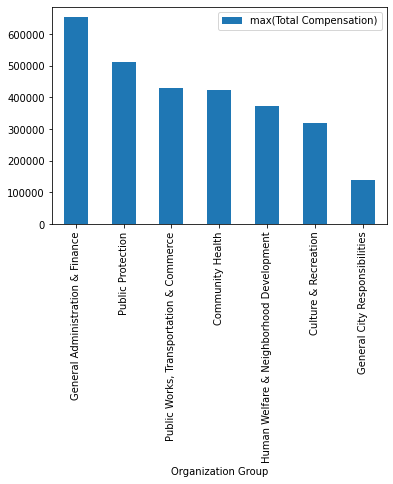

In [32]:
pandasDF.plot.bar(x="Organization Group", y="max(Total Compensation)")

#### 5.2. Find top Compensating Jobs. Display using bar plot

In [33]:
pandasDF_jobs = df4.select("Job Family","Total Compensation").groupby("Job Family").agg({"Total Compensation":"max"}).sort(desc("max(Total Compensation)")).toPandas()

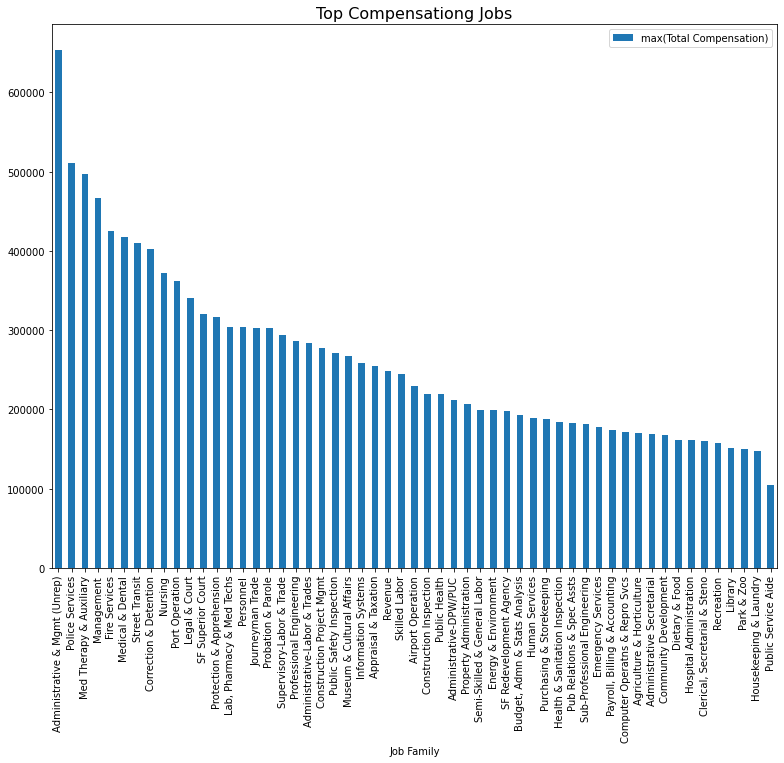

In [34]:
fig, ax = plt.subplots(figsize=(13,10))
pandasDF_jobs.plot.bar(x="Job Family", y="max(Total Compensation)", ax=ax)
ax.set_title('Top Compensationg Jobs', fontsize=16)
plt.show()

#### 5.3. Check Correlation of Target Variable with Other Independent Variables. Plot Heatmap

Correlation heatmap with df4 numerical columns


In [35]:
hmap_columns = [item[0] for item in df4.dtypes if not item[1].startswith('string')] 

In [36]:
# Import VectorAssembler from pyspark.ml.feature package and Correlation from pyspark.ml.stat
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.stat import Correlation

# Create the VectorAssembler object
assembler = VectorAssembler(inputCols=hmap_columns, outputCol="numerical_features")
assembled_df = assembler.transform(df4)
matrix = Correlation.corr(assembled_df, "numerical_features", 'pearson')
cor_np = matrix.collect()[0][matrix.columns[0]].toArray()


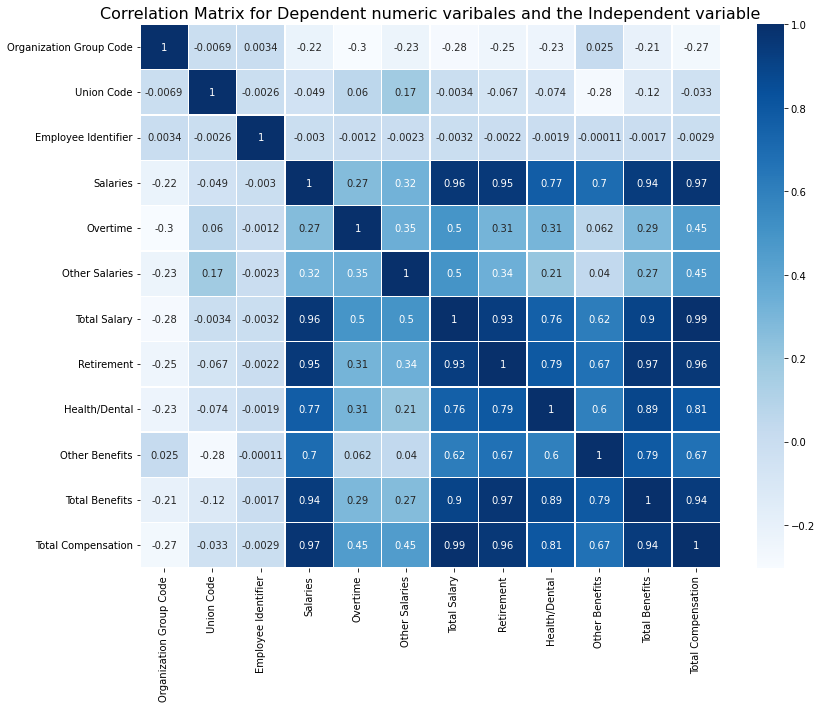

In [37]:
import seaborn as sns 
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(13,10))

sns.heatmap(cor_np, linewidths=.5, cmap='Blues',ax=ax, annot=True,
            xticklabels=hmap_columns, yticklabels=hmap_columns)
ax.set_title('Correlation Matrix for Dependent numeric varibales and the Independent variable', fontsize=16)
plt.show()


### 6. Perform necessary data pre-processing and divide the data into train and test set

### 6.1 Categorise the attributes into its type (Use one hot encoding wherever required)

In [38]:
df4.printSchema()

root
 |-- Organization Group Code: integer (nullable = true)
 |-- Organization Group: string (nullable = true)
 |-- Department Code: string (nullable = true)
 |-- Department: string (nullable = true)
 |-- Union Code: integer (nullable = true)
 |-- Union: string (nullable = false)
 |-- Job Family Code: string (nullable = false)
 |-- Job Family: string (nullable = false)
 |-- Job Code: string (nullable = true)
 |-- Job: string (nullable = true)
 |-- Employee Identifier: integer (nullable = true)
 |-- Salaries: double (nullable = true)
 |-- Overtime: double (nullable = true)
 |-- Other Salaries: double (nullable = true)
 |-- Total Salary: double (nullable = true)
 |-- Retirement: double (nullable = true)
 |-- Health/Dental: double (nullable = true)
 |-- Other Benefits: double (nullable = true)
 |-- Total Benefits: double (nullable = true)
 |-- Total Compensation: double (nullable = true)



In [39]:
# Extracting columns 
columnList = [item[0] for item in df4.dtypes if item[1].startswith('string')]

In [40]:
output_column_list = list(map(lambda x: x+"_index", columnList))

In [41]:
# String indexer
from pyspark.ml.feature import StringIndexer, OneHotEncoder
indexers = StringIndexer(inputCols=columnList, 
                         outputCols=output_column_list)
strindexedDF = indexers.fit(df4).transform(df4)
df5 = strindexedDF.select("*")
df5.show()



+-----------------------+--------------------+---------------+--------------------+----------+--------------------+---------------+--------------------+--------+--------------------+-------------------+---------+--------+--------------+------------+----------+-------------+--------------+--------------+------------------+------------------------+---------------------+----------------+-----------+---------------------+----------------+--------------+---------+
|Organization Group Code|  Organization Group|Department Code|          Department|Union Code|               Union|Job Family Code|          Job Family|Job Code|                 Job|Employee Identifier| Salaries|Overtime|Other Salaries|Total Salary|Retirement|Health/Dental|Other Benefits|Total Benefits|Total Compensation|Organization Group_index|Department Code_index|Department_index|Union_index|Job Family Code_index|Job Family_index|Job Code_index|Job_index|
+-----------------------+--------------------+---------------+----------

In [42]:
# Dropping columns post String Indexing
df6 = df5.drop(*columnList)

In [43]:
op_column_list = list(map(lambda x: x+"_vec", columnList))

In [44]:
# One Hot Encoder
from pyspark.ml.feature import OneHotEncoder
encoder = OneHotEncoder(inputCols= output_column_list , 
                         outputCols=op_column_list)
df7 = encoder.fit(df6).transform(df6)
df7.select("*").show(5, False)

+-----------------------+----------+-------------------+---------+--------+--------------+------------+----------+-------------+--------------+--------------+------------------+------------------------+---------------------+----------------+-----------+---------------------+----------------+--------------+---------+----------------------+-------------------+---------------+---------------+-------------------+---------------+------------------+------------------+
|Organization Group Code|Union Code|Employee Identifier|Salaries |Overtime|Other Salaries|Total Salary|Retirement|Health/Dental|Other Benefits|Total Benefits|Total Compensation|Organization Group_index|Department Code_index|Department_index|Union_index|Job Family Code_index|Job Family_index|Job Code_index|Job_index|Organization Group_vec|Department Code_vec|Department_vec |Union_vec      |Job Family Code_vec|Job Family_vec |Job Code_vec      |Job_vec           |
+-----------------------+----------+-------------------+---------+

In [45]:
# Dropping columns post One hot Encoding
df8 = df7.drop(*output_column_list)

In [46]:
df8.printSchema()

root
 |-- Organization Group Code: integer (nullable = true)
 |-- Union Code: integer (nullable = true)
 |-- Employee Identifier: integer (nullable = true)
 |-- Salaries: double (nullable = true)
 |-- Overtime: double (nullable = true)
 |-- Other Salaries: double (nullable = true)
 |-- Total Salary: double (nullable = true)
 |-- Retirement: double (nullable = true)
 |-- Health/Dental: double (nullable = true)
 |-- Other Benefits: double (nullable = true)
 |-- Total Benefits: double (nullable = true)
 |-- Total Compensation: double (nullable = true)
 |-- Organization Group_vec: vector (nullable = true)
 |-- Department Code_vec: vector (nullable = true)
 |-- Department_vec: vector (nullable = true)
 |-- Union_vec: vector (nullable = true)
 |-- Job Family Code_vec: vector (nullable = true)
 |-- Job Family_vec: vector (nullable = true)
 |-- Job Code_vec: vector (nullable = true)
 |-- Job_vec: vector (nullable = true)



In [47]:
df8.show()

+-----------------------+----------+-------------------+---------+--------+--------------+------------+----------+-------------+--------------+--------------+------------------+----------------------+-------------------+---------------+---------------+-------------------+---------------+------------------+------------------+
|Organization Group Code|Union Code|Employee Identifier| Salaries|Overtime|Other Salaries|Total Salary|Retirement|Health/Dental|Other Benefits|Total Benefits|Total Compensation|Organization Group_vec|Department Code_vec| Department_vec|      Union_vec|Job Family Code_vec| Job Family_vec|      Job Code_vec|           Job_vec|
+-----------------------+----------+-------------------+---------+--------+--------------+------------+----------+-------------+--------------+--------------+------------------+----------------------+-------------------+---------------+---------------+-------------------+---------------+------------------+------------------+
|                  

In [48]:
df8.columns

['Organization Group Code',
 'Union Code',
 'Employee Identifier',
 'Salaries',
 'Overtime',
 'Other Salaries',
 'Total Salary',
 'Retirement',
 'Health/Dental',
 'Other Benefits',
 'Total Benefits',
 'Total Compensation',
 'Organization Group_vec',
 'Department Code_vec',
 'Department_vec',
 'Union_vec',
 'Job Family Code_vec',
 'Job Family_vec',
 'Job Code_vec',
 'Job_vec']

In [49]:
columns = ['Organization Group Code',
 'Union Code',
 'Employee Identifier',
 'Salaries',
 'Overtime',
 'Other Salaries',
 'Total Salary',
 'Retirement',
 'Health/Dental',
 'Other Benefits',
 'Total Benefits']

In [51]:
# Vectorizing the independent features
from pyspark.ml.feature import VectorAssembler
featureassembler=VectorAssembler(inputCols=columns,outputCol="Numeric_Features")
df9 = featureassembler.transform(df8)

In [52]:
df9.show()

+-----------------------+----------+-------------------+---------+--------+--------------+------------+----------+-------------+--------------+--------------+------------------+----------------------+-------------------+---------------+---------------+-------------------+---------------+------------------+------------------+--------------------+
|Organization Group Code|Union Code|Employee Identifier| Salaries|Overtime|Other Salaries|Total Salary|Retirement|Health/Dental|Other Benefits|Total Benefits|Total Compensation|Organization Group_vec|Department Code_vec| Department_vec|      Union_vec|Job Family Code_vec| Job Family_vec|      Job Code_vec|           Job_vec|    Numeric_Features|
+-----------------------+----------+-------------------+---------+--------+--------------+------------+----------+-------------+--------------+--------------+------------------+----------------------+-------------------+---------------+---------------+-------------------+---------------+----------------

In [53]:
# Import StandardScaler from pyspark.ml.feature package
from pyspark.ml.feature import StandardScaler

# Create the StandardScaler object. It only take feature column (dense vector)
stdscaler = StandardScaler(inputCol="Numeric_Features", outputCol="Scaled_Features")

# Fit the StandardScaler object on the output of the dense vector data and transform
df10 = stdscaler.fit(df9).transform(df9)
df10.select("*").show()

+-----------------------+----------+-------------------+---------+--------+--------------+------------+----------+-------------+--------------+--------------+------------------+----------------------+-------------------+---------------+---------------+-------------------+---------------+------------------+------------------+--------------------+--------------------+
|Organization Group Code|Union Code|Employee Identifier| Salaries|Overtime|Other Salaries|Total Salary|Retirement|Health/Dental|Other Benefits|Total Benefits|Total Compensation|Organization Group_vec|Department Code_vec| Department_vec|      Union_vec|Job Family Code_vec| Job Family_vec|      Job Code_vec|           Job_vec|    Numeric_Features|     Scaled_Features|
+-----------------------+----------+-------------------+---------+--------+--------------+------------+----------+-------------+--------------+--------------+------------------+----------------------+-------------------+---------------+---------------+----------

In [54]:
df11 = df10.drop(*columns, "Independent_Features")

In [55]:
df11.show()

+------------------+----------------------+-------------------+---------------+---------------+-------------------+---------------+------------------+------------------+--------------------+--------------------+
|Total Compensation|Organization Group_vec|Department Code_vec| Department_vec|      Union_vec|Job Family Code_vec| Job Family_vec|      Job Code_vec|           Job_vec|    Numeric_Features|     Scaled_Features|
+------------------+----------------------+-------------------+---------------+---------------+-------------------+---------------+------------------+------------------+--------------------+--------------------+
|         159436.65|         (6,[2],[1.0])|    (53,[19],[1.0])|(53,[19],[1.0])|(72,[15],[1.0])|    (55,[16],[1.0])|(54,[16],[1.0])| (1132,[15],[1.0])| (1138,[15],[1.0])|[1.0,311.0,49919....|[0.63380556910016...|
|         120054.05|         (6,[4],[1.0])|    (53,[43],[1.0])|(53,[43],[1.0])| (72,[0],[1.0])|    (55,[14],[1.0])|(54,[14],[1.0])|(1132,[135],[1.0])|(1

In [56]:
df11.columns 

['Total Compensation',
 'Organization Group_vec',
 'Department Code_vec',
 'Department_vec',
 'Union_vec',
 'Job Family Code_vec',
 'Job Family_vec',
 'Job Code_vec',
 'Job_vec',
 'Numeric_Features',
 'Scaled_Features']

In [57]:
# Create a list of all the variables that you want to create feature vectors
# These features are then further used for training model
features_columns = ['Organization Group_vec',
 'Department Code_vec',
 'Department_vec',
 'Union_vec',
 'Job Family Code_vec',
 'Job Family_vec',
 'Job Code_vec',
 'Job_vec',
 'Numeric_Features',
 'Scaled_Features']

In [59]:
# Creating a Vector of all the features together using a VectorAssembler
from pyspark.ml.feature import VectorAssembler
assembler = VectorAssembler(inputCols=features_columns, outputCol="independent_features")
df12 = assembler.transform(df11)

In [62]:
final_DF = df12.select("independent_features", "Total Compensation")

### 6.2 Split the data into train and test set

In [63]:
# We spilt the data into 70-30 set
# Training Set - 70% obesevations
# Testing Set - 30% observations
trainDF, testDF =  final_DF.randomSplit([0.7,0.3], seed = 42)

# print the count of observations in each set
print("Observations in training set = ", trainDF.count())
print("Observations in testing set = ", testDF.count())

Observations in training set =  204346
Observations in testing set =  87479


### 7. Fit Linear Regression model on the data and check its performance

In [64]:
# Linear Regression
from pyspark.ml.regression import LinearRegression
regressor=LinearRegression(featuresCol='independent_features', labelCol='Total Compensation')
lr_model=regressor.fit(trainDF)

In [65]:
# Prediction
pred_results_lr=lr_model.evaluate(testDF)

In [66]:
pred_results_lr.predictions.show()

+--------------------+------------------+------------------+
|independent_features|Total Compensation|        prediction|
+--------------------+------------------+------------------+
|(2585,[0,7,60,112...|         126922.31| 126928.1806736858|
|(2585,[0,7,60,112...|          102838.8|102854.79846198186|
|(2585,[0,7,60,112...|         109989.99|109996.87461319349|
|(2585,[0,7,60,112...|         110126.03|110138.08035879054|
|(2585,[0,7,60,112...|          74268.47| 74270.49666911803|
|(2585,[0,7,60,112...|          95119.65| 95118.82821599068|
|(2585,[0,7,60,112...|          111428.5|111432.83244958974|
|(2585,[0,7,60,112...|         111131.64|111135.13089200167|
|(2585,[0,7,60,112...|          104513.3|104526.87886972589|
|(2585,[0,7,60,112...|         111640.46|111651.01392463874|
|(2585,[0,7,60,112...|         119244.74|119247.69439636062|
|(2585,[0,7,60,112...|         169037.06| 169030.7974378206|
|(2585,[0,7,60,112...|          78002.98| 77992.69454644293|
|(2585,[0,7,60,112...|  

In [67]:
# Printing metrics
print("Linear Regression - RMSE: ",pred_results_lr.meanSquaredError)
print("Linear Regression - MAE: ",pred_results_lr.meanAbsoluteError)
print("Linear Regression - R-squared: ",pred_results_lr.r2) 

Linear Regression - RMSE:  177787.039178916
Linear Regression - MAE:  21.345476473616458
Linear Regression - R-squared:  0.9999612066130734


### 8. Fit Decision Tree Regression model on the data and check its performance (Optional)

In [69]:
from pyspark.ml.regression import DecisionTreeRegressor
dt = DecisionTreeRegressor(featuresCol ='independent_features', labelCol = 'Total Compensation')
dt_model = dt.fit(trainDF)

In [70]:
pred_results_dt=dt_model.transform(testDF)

In [71]:
pred_results_dt.show()

+--------------------+------------------+------------------+
|independent_features|Total Compensation|        prediction|
+--------------------+------------------+------------------+
|(2585,[0,7,60,112...|         126922.31|134710.90942732003|
|(2585,[0,7,60,112...|          102838.8|100417.38188391038|
|(2585,[0,7,60,112...|         109989.99|108533.63300297054|
|(2585,[0,7,60,112...|         110126.03|115179.90635371441|
|(2585,[0,7,60,112...|          74268.47| 73155.13391513983|
|(2585,[0,7,60,112...|          95119.65|100417.38188391038|
|(2585,[0,7,60,112...|          111428.5|115179.90635371441|
|(2585,[0,7,60,112...|         111131.64|115179.90635371441|
|(2585,[0,7,60,112...|          104513.3|100417.38188391038|
|(2585,[0,7,60,112...|         111640.46|115179.90635371441|
|(2585,[0,7,60,112...|         119244.74|123690.58182450364|
|(2585,[0,7,60,112...|         169037.06|172184.82143890782|
|(2585,[0,7,60,112...|          78002.98| 73155.13391513983|
|(2585,[0,7,60,112...|  

In [72]:
from pyspark.ml.evaluation import RegressionEvaluator
rmse=RegressionEvaluator(labelCol="Total Compensation", predictionCol="prediction", metricName="rmse")
rmse=rmse.evaluate(pred_results_dt) 

mae=RegressionEvaluator(labelCol="Total Compensation", predictionCol="prediction", metricName="mae")
mae=mae.evaluate(pred_results_dt) 
 
r2=RegressionEvaluator(labelCol="Total Compensation", predictionCol="prediction", metricName="r2")
r2=r2.evaluate(pred_results_dt)

print("RMSE: ", rmse)
print("MAE: ", mae)
print("R-squared: ", r2)

RMSE:  6549.435180723439
MAE:  4188.590750327838
R-squared:  0.9906402274020201


### Model Persistence (Optional)
Model persistence means saving your model to a disk. After you finalize your model for prediction depending upon the performance, you need to save the model to the disk. Let's say, you finalize 'lrmodel' to be used for in production environment i.e. in your application. We use the following code to save it.

##### Saving the model

In [75]:
# use save() method to save the model
# write().overwrite() is usually used when you want to replace the older model with a new one
# It might happen that you wish to retrain your model and save it at the same the place
lr_model.write().overwrite().save("/content/drive/MyDrive/ColabNotebooks/lr_model")
dt_model.write().overwrite().save("/content/drive/MyDrive/ColabNotebooks/dt_model")

##### Loading the model

In [77]:
# import PipelineModel from pyspark.ml package
#from pyspark.ml import PipelineModel
from pyspark.ml.regression import LinearRegressionModel
from pyspark.ml.regression import DecisionTreeRegressionModel

# load the model from the location it is stored
# The loaded model acts as PipelineModel
model_lr = LinearRegressionModel.load("content/drive/MyDrive/ColabNotebooks/lr_model")
model_dt = DecisionTreeRegressionModel.load("content/drive/MyDrive/ColabNotebooks/dt_model")

# use the PipelineModel object to perform prediciton on test data. 
# Use .transform() to perfrom prediction
prediction_lr = model_lr.transform(testDF)
prediction_rt = model_dt.transform(testDF)

# print the results
prediction_lr.select('*').show(5)
prediction_rt.select('*').show(5)

+--------------------+------------------+------------------+
|independent_features|Total Compensation|        prediction|
+--------------------+------------------+------------------+
|(2585,[0,7,60,112...|         126922.31| 126928.1806736858|
|(2585,[0,7,60,112...|          102838.8|102854.79846198186|
|(2585,[0,7,60,112...|         109989.99|109996.87461319349|
|(2585,[0,7,60,112...|         110126.03|110138.08035879054|
|(2585,[0,7,60,112...|          74268.47| 74270.49666911803|
+--------------------+------------------+------------------+
only showing top 5 rows

+--------------------+------------------+------------------+
|independent_features|Total Compensation|        prediction|
+--------------------+------------------+------------------+
|(2585,[0,7,60,112...|         126922.31|134710.90942732003|
|(2585,[0,7,60,112...|          102838.8|100417.38188391038|
|(2585,[0,7,60,112...|         109989.99|108533.63300297054|
|(2585,[0,7,60,112...|         110126.03|115179.90635371441|